Pruebas para leer O2 de BodySim


In [63]:
import numpy as np
import netCDF4
from matplotlib import pyplot as plt
from scipy.interpolate import griddata


filename = '../body/Washington-1d-2008-09-12_compr.nc'
#varname = 'WQ_O'
varname = 'WQ_ALG'

#Inicialización
nc = netCDF4.Dataset(filename)

#   Not all variables have the same dimensions, see file info for details
lat = np.array(nc['lat'])
lon = np.array(nc['lon'])
time= np.array(nc['time'])
layers= np.array(nc['layers'])
var= np.array(nc[varname])

# Remove fill values
lat[lat == nc['lat'].FillValue] = np.nan
lon[lon == nc['lon'].FillValue] = np.nan
var[var== nc[varname].FillValue]= np.nan
var[var< 0.015]= np.nan
if varname== 'WQ_ALG':
    var=var[:,:,:,:,0]
print(time)

[1350.02   1350.0204 1350.0208 ... 1351.0194 1351.0198 1351.0201]


In [59]:
#My election

myt=50
mylyr=10
mylat=47.65
mylon=-122.26
vartl=var[myt,:,:,mylyr]

latflat = lat[np.logical_not(np.isnan(lat))]
lonflat = lon[np.logical_not(np.isnan(lat))]
varflat = vartl[np.logical_not(np.isnan(lat))]

z = griddata((lonflat, latflat), varflat,(mylon,mylat), method='linear')

print(z)



0.0013176674171474336


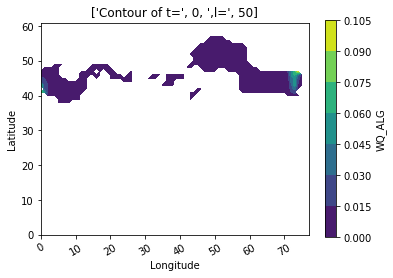

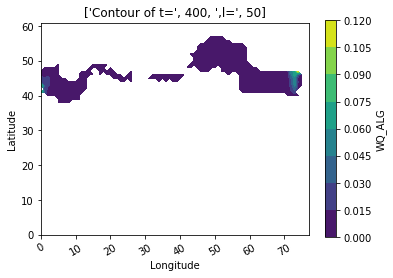

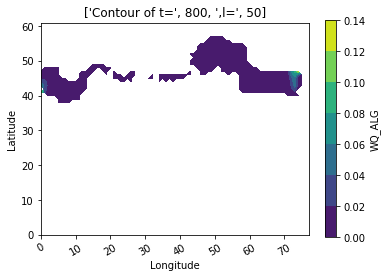

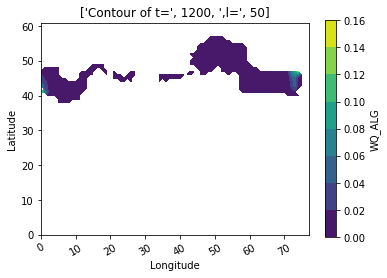

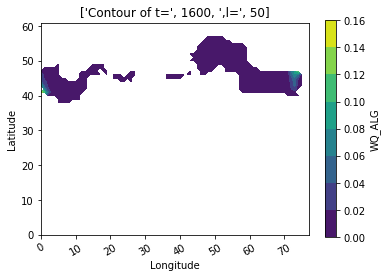

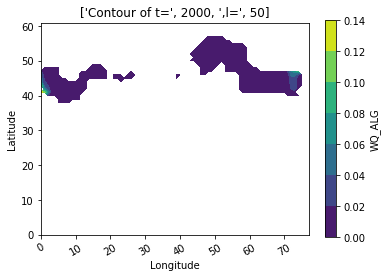

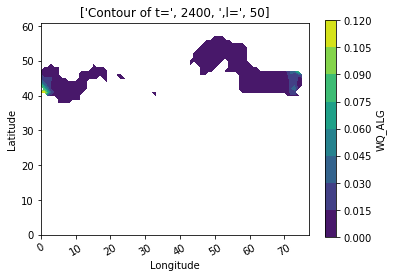

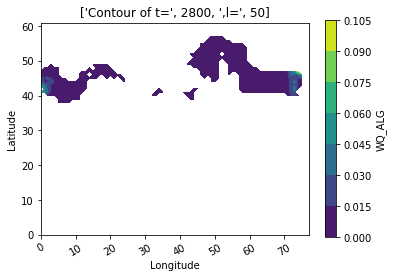

In [60]:
# Interpolate given data to grid
#   Other interpolations might be better for a specific application
#x = np.linspace(np.nanmin(lon), np.nanmax(lon), 100)
#y = np.linspace(np.nanmin(lat), np.nanmax(lat), 100)
x = np.linspace(-122.2, -122.3, 100)
y = np.linspace(47.50, 47.70, 100)

X, Y = np.meshgrid(x,y)
#X, Y = np.mgrid[x, y]
#z = griddata((lonflat, latflat), varflat,(x[None,:], y[:,None]), method='linear')
for t in range(0,2881,400):
  for l in range(50,51,10):# in range(4,55,10):
    vartflat=var[t,:,:,l]
    vartl=var[t,:,:,l]
    Z = griddata((lonflat, latflat), varflat,(X, Y), method='linear')
    #Z = griddata((lon, lat), vartl,(X, Y), method='nearest')
    plt.figure()#(figsize=(5, 5), dpi=300)
    #plt.contourf(X,Y,Z,cmap=plt.cm.jet)
    #plt.contourf(X,Y,Z)
    plt.contourf(vartl)
    cbar = plt.colorbar()
    plt.xlabel('Longitude'), plt.xticks(rotation=30)
    plt.ylabel('Latitude')
    cbar.set_label(varname)
    plt.title(['Contour of t=',t,',l=',l])
    plt.gca().set_aspect('equal')

In [61]:
nc.close()